In [1]:
import cv2
import os
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from PIL import Image
from scipy.spatial import distance
import pandas as pd

In [2]:
import json

# Preprocess

In [2]:
# def image2array(folder):
#     images = []
#     for filename in os.listdir(folder):
#         img = cv2.imread(os.path.join(folder,filename))
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         img = cv2.resize(img, (224,224))
#         if img is not None:
#             images.append(np.array(img))
#     images = np.array(images)
#     images = images.reshape(images.shape[0], 224, 224, 3)
#     images = images.astype('float32')
#     images /= 255
#     return images

In [3]:
# train_data = image2array(r"C:\\ITM\\pants")
# print("Length of training dataset:",train_data.shape)
# # test_data = image2array(test_files)
# # print("Length of test dataset:",test_data.shape)

In [4]:
# from matplotlib import pyplot as plt
# plt.imshow(train_data[5], interpolation='nearest')
# plt.show()

# Pre-Trained Model

In [3]:
model_url = "https://tfhub.dev/tensorflow/efficientnet/lite0/feature-vector/2"

IMAGE_SHAPE = (224, 224)

layer = hub.KerasLayer(model_url, input_shape=IMAGE_SHAPE+(3,))
model = tf.keras.Sequential([layer])

In [4]:
model.save('./preweight/efficientnet.h5')

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              3413024   
                                                                 
Total params: 3,413,024
Trainable params: 0
Non-trainable params: 3,413,024
_________________________________________________________________


In [2]:
IMAGE_SHAPE = (224, 224)
test_model = keras.models.load_model('./preweight/efficientnet.h5',custom_objects={'KerasLayer':hub.KerasLayer})

In [4]:
test_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              3413024   
                                                                 
Total params: 3,413,024
Trainable params: 0
Non-trainable params: 3,413,024
_________________________________________________________________


In [9]:
def extract(file):
    file = Image.open(file).convert('L').resize(IMAGE_SHAPE)
    display(file)

    file = np.stack((file,)*3, axis=-1)

    file = np.array(file)/255.0

    embedding = test_model.predict(file[np.newaxis, ...])
#     print(embedding)
    vgg16_feature_np = np.array(embedding)
    flattended_feature = vgg16_feature_np.flatten()

    #print(len(flattended_feature))
    #print(flattended_feature)
    #print('-----------')
    return flattended_feature

In [5]:
def extractAll(folder):
    images = []
    data = {
        "feature": [],
        "name": []
    }
    df = pd.DataFrame(data)
    for filename in os.listdir(folder):
        img = extract(os.path.join(folder,filename))
        if img is not None:           
#             images.append(np.array(img))
            df.loc[len(df.index)] = [img,filename] 
    return df

In [21]:
pants1 = extract(r'C:\ITM\pants\3.png')
pants2 = extract(r'C:\ITM\pants\5.png')
skirt1 = extract(r'C:\ITM\skirt\1.png')

In [10]:
pants1.shape

(1280,)

In [6]:
images = extractAll(r"C:\Users\JoEy.S\Documents\GitHub\ITM_Group4_Reverse_Image_Search_for_Online_Shopping\Datasets\Arbid\Arbid_shirt_1")
type(images)

C:\Users\JoEy.S\anaconda3\envs\tmrcnnt3\lib\site-packages\pandas\core\dtypes\cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


pandas.core.frame.DataFrame

In [7]:
images

,feature,name
0,"[0.014319153, 0.0, 0.018299231, 0.0, 0.0, 0.0,...",Arbid_shirt_ (1).jpg
1,"[0.0014879382, 0.0, 0.49348387, 0.104236506, 0...",Arbid_shirt_ (10).jpg
2,"[0.0072918436, 0.0, 0.00873647, 0.0, 0.0, 0.0,...",Arbid_shirt_ (100).jpg
3,"[0.41508704, 0.0, 0.17056173, 0.0, 0.0, 0.0, 0...",Arbid_shirt_ (1000).jpg
4,"[0.34005332, 0.0, 0.41346347, 0.09129969, 0.0,...",Arbid_shirt_ (1001).jpg
...,...,...
1047,"[0.15238844, 0.0, 0.37246576, 0.0, 0.0, 0.0, 0...",Arbid_shirt_ (995).jpg
1048,"[0.10490531, 0.0, 0.69175196, 0.042719953, 0.0...",Arbid_shirt_ (996).jpg
1049,"[0.040088236, 0.0, 0.5167002, 0.0019237294, 0....",Arbid_shirt_ (997).jpg
1050,"[0.0, 0.0, 0.06832594, 0.0, 0.0, 0.0, 0.0, 0.0...",Arbid_shirt_ (998).jpg


In [8]:
def findClosest(x,df):
    metric = 'cosine'
    data = {
        "distance": [],
        "name": []
    }
    result_df = pd.DataFrame(data)
    for i in df.index:          
        dc = distance.cdist([x], [df['feature'][i]], metric)[0]
        if dc is not None:
            result_df.loc[len(result_df.index)] = [dc,df['name'][i]]
    return result_df.sort_values(by=['distance'])

In [12]:
images = np.array(images)
type(images)

numpy.ndarray

In [15]:
images.shape[0]

6

In [17]:
metric = 'cosine'

In [ ]:
dc = distance.cdist([x], [pants1], metric)[0]
print(dc)
print("the distance between pants1 and the pants1 is {}".format(dc))

In [102]:
# def findClosest(x,items):
#     metric = 'cosine'
#     dc_array = []
#     for item in range(0,items.shape[0]) :
#         dc = distance.cdist([x], [items[item]], metric)[0]
#         if item is not None:
#             dc = np.append(dc,item)
#             print(dc.shape)
#             dc_array.append(np.array(dc))
# #     dc_array.sort()
# #     dc_array = dc_array[dc_array[:,1].argsort(kind='mergesort')] #error
#     return np.array(dc_array)

# image store to json and extract

In [9]:
x = extract(r'C:\Users\JoEy.S\Documents\GitHub\ITM_Group4_Reverse_Image_Search_for_Online_Shopping\Datasets\Arbid\Arbid_shirt_1\Arbid_shirt_ (275).jpg')

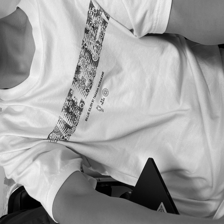

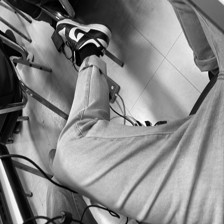

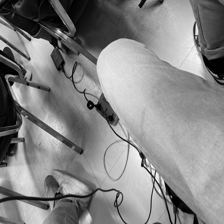

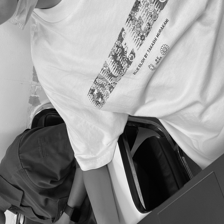

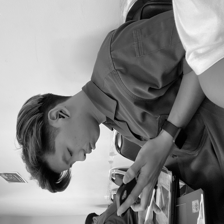

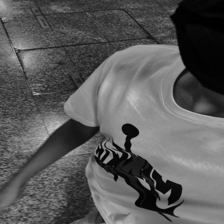

In [13]:
t1 = extract(r'C:\Users\JoEy.S\Downloads\joe.jpg')
t2 = extract(r'C:\Users\JoEy.S\Downloads\joe (2).jpg')
t3 = extract(r'C:\Users\JoEy.S\Downloads\joe (3).jpg')
t4 = extract(r'C:\Users\JoEy.S\Downloads\joe (4).jpg')
t5 = extract(r'C:\Users\JoEy.S\Downloads\joe (5).jpg')
t6 = extract(r'C:\Users\JoEy.S\Downloads\joe (6).jpg')

In [14]:
result = findClosest(t1,images)
print(result)
result = findClosest(t2,images)
print(result)
result = findClosest(t3,images)
print(result)
result = findClosest(t4,images)
print(result)
result = findClosest(t5,images)
print(result)
result = findClosest(t6,images)
print(result)

C:\Users\JoEy.S\anaconda3\envs\tmrcnnt3\lib\site-packages\pandas\core\dtypes\cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


                  distance                     name
611   [0.6415485059943961]   Arbid_shirt_ (601).jpg
211   [0.6421189381109971]   Arbid_shirt_ (241).jpg
22    [0.6432883785147195]  Arbid_shirt_ (1018).jpg
903   [0.6448008583642217]   Arbid_shirt_ (865).jpg
30    [0.6488937179172364]  Arbid_shirt_ (1025).jpg
...                    ...                      ...
852   [0.8345364414730794]   Arbid_shirt_ (819).jpg
663   [0.8385116271311349]   Arbid_shirt_ (649).jpg
337   [0.8386180535147215]   Arbid_shirt_ (355).jpg
495   [0.8407127499561343]   Arbid_shirt_ (498).jpg
1021  [0.8492409574684793]   Arbid_shirt_ (971).jpg

[1052 rows x 2 columns]


C:\Users\JoEy.S\anaconda3\envs\tmrcnnt3\lib\site-packages\pandas\core\dtypes\cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


                  distance                    name
627   [0.7223288017819709]  Arbid_shirt_ (616).jpg
503    [0.722529461626374]  Arbid_shirt_ (504).jpg
423   [0.7465747992059208]  Arbid_shirt_ (432).jpg
842   [0.7497299573143078]   Arbid_shirt_ (81).jpg
250   [0.7531449021984581]  Arbid_shirt_ (277).jpg
...                    ...                     ...
1050  [0.8883020769605864]  Arbid_shirt_ (998).jpg
950   [0.8883685525383438]  Arbid_shirt_ (907).jpg
96    [0.8884606022357624]  Arbid_shirt_ (138).jpg
890   [0.8889310002194163]  Arbid_shirt_ (853).jpg
1002  [0.8933853113041693]  Arbid_shirt_ (954).jpg

[1052 rows x 2 columns]


C:\Users\JoEy.S\anaconda3\envs\tmrcnnt3\lib\site-packages\pandas\core\dtypes\cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


                  distance                     name
611   [0.6721598995964496]   Arbid_shirt_ (601).jpg
250   [0.6827089799208647]   Arbid_shirt_ (277).jpg
854   [0.6903996090403435]   Arbid_shirt_ (820).jpg
903   [0.6926812496338342]   Arbid_shirt_ (865).jpg
627   [0.6953845398349268]   Arbid_shirt_ (616).jpg
...                    ...                      ...
1010  [0.8589592012689143]   Arbid_shirt_ (961).jpg
56     [0.861251165741018]  Arbid_shirt_ (1049).jpg
921   [0.8646099856361177]   Arbid_shirt_ (881).jpg
841   [0.8647432672365403]   Arbid_shirt_ (809).jpg
705   [0.8707769221234095]   Arbid_shirt_ (687).jpg

[1052 rows x 2 columns]


C:\Users\JoEy.S\anaconda3\envs\tmrcnnt3\lib\site-packages\pandas\core\dtypes\cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


                 distance                    name
611  [0.6090331064023775]  Arbid_shirt_ (601).jpg
423  [0.6223650652564495]  Arbid_shirt_ (432).jpg
503  [0.6306545344891753]  Arbid_shirt_ (504).jpg
689  [0.6478764309367959]  Arbid_shirt_ (672).jpg
780  [0.6554366975619073]  Arbid_shirt_ (754).jpg
..                    ...                     ...
581  [0.7958808267198372]  Arbid_shirt_ (575).jpg
496  [0.7961072680085381]  Arbid_shirt_ (499).jpg
309  [0.7989258913377083]   Arbid_shirt_ (33).jpg
274  [0.8023224928855073]  Arbid_shirt_ (299).jpg
852  [0.8079374478881699]  Arbid_shirt_ (819).jpg

[1052 rows x 2 columns]


C:\Users\JoEy.S\anaconda3\envs\tmrcnnt3\lib\site-packages\pandas\core\dtypes\cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


                 distance                    name
503   [0.621820871011354]  Arbid_shirt_ (504).jpg
903  [0.6526190161606915]  Arbid_shirt_ (865).jpg
627   [0.664381590065735]  Arbid_shirt_ (616).jpg
611  [0.6909796458566118]  Arbid_shirt_ (601).jpg
680  [0.6935146888134984]  Arbid_shirt_ (664).jpg
..                    ...                     ...
688  [0.8286760724815545]  Arbid_shirt_ (671).jpg
638  [0.8290438342220396]  Arbid_shirt_ (626).jpg
723  [0.8312751246195824]  Arbid_shirt_ (702).jpg
970  [0.8325028027667835]  Arbid_shirt_ (925).jpg
96   [0.8335979025095143]  Arbid_shirt_ (138).jpg

[1052 rows x 2 columns]


C:\Users\JoEy.S\anaconda3\envs\tmrcnnt3\lib\site-packages\pandas\core\dtypes\cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


                 distance                    name
250   [0.646380853462417]  Arbid_shirt_ (277).jpg
842  [0.6483853896818337]   Arbid_shirt_ (81).jpg
568  [0.6587794672115403]  Arbid_shirt_ (563).jpg
219   [0.663810956741507]  Arbid_shirt_ (249).jpg
563  [0.6669161385249662]  Arbid_shirt_ (559).jpg
..                    ...                     ...
389  [0.7960801446644761]  Arbid_shirt_ (401).jpg
706  [0.7989890494945844]  Arbid_shirt_ (688).jpg
927  [0.8001601479561357]  Arbid_shirt_ (887).jpg
676  [0.8037295559497029]  Arbid_shirt_ (660).jpg
96   [0.8064622244953978]  Arbid_shirt_ (138).jpg

[1052 rows x 2 columns]


In [12]:
type(x)

numpy.ndarray

In [30]:
jsn = json.dumps(x.tolist())

In [14]:
jsn

'[0.051723968237638474, 0.0, 0.09897536784410477, 0.0, 0.0, 0.0, 0.0, 0.1774028241634369, 0.0, 0.0, 0.01474226824939251, 0.0, 0.036639504134655, 0.0018367682350799441, 0.0, 0.08362532407045364, 0.0, 0.0, 0.0, 0.13583458960056305, 0.0, 0.0, 0.0, 0.011785304173827171, 0.0, 0.0, 0.22030887007713318, 0.15923987329006195, 0.8236945867538452, 0.22613081336021423, 0.0018958182772621512, 0.04673737287521362, 0.01844767853617668, 0.0, 1.7450262308120728, 0.3015909790992737, 0.0, 0.0, 0.0, 1.665256381034851, 0.0, 0.9574573040008545, 0.0, 0.0, 0.023872010409832, 0.0, 0.0, 0.0, 0.02160099521279335, 0.07308090478181839, 0.0, 0.15312206745147705, 0.0, 0.0035893607418984175, 0.0, 0.0, 0.09893351048231125, 0.0, 0.0, 0.0, 0.6369576454162598, 0.005761856213212013, 0.0, 1.1790012121200562, 0.0, 0.0, 0.0, 0.0, 0.006983019411563873, 0.0, 0.0, 0.20576722919940948, 0.0, 0.0, 0.0, 0.0, 0.0, 0.060320816934108734, 0.0, 0.06766537576913834, 0.0, 0.15022552013397217, 0.0, 0.012918445281684399, 0.27782320976257324

In [15]:
listx = json.loads(jsn)

In [16]:
listx

[0.051723968237638474,
 0.0,
 0.09897536784410477,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1774028241634369,
 0.0,
 0.0,
 0.01474226824939251,
 0.0,
 0.036639504134655,
 0.0018367682350799441,
 0.0,
 0.08362532407045364,
 0.0,
 0.0,
 0.0,
 0.13583458960056305,
 0.0,
 0.0,
 0.0,
 0.011785304173827171,
 0.0,
 0.0,
 0.22030887007713318,
 0.15923987329006195,
 0.8236945867538452,
 0.22613081336021423,
 0.0018958182772621512,
 0.04673737287521362,
 0.01844767853617668,
 0.0,
 1.7450262308120728,
 0.3015909790992737,
 0.0,
 0.0,
 0.0,
 1.665256381034851,
 0.0,
 0.9574573040008545,
 0.0,
 0.0,
 0.023872010409832,
 0.0,
 0.0,
 0.0,
 0.02160099521279335,
 0.07308090478181839,
 0.0,
 0.15312206745147705,
 0.0,
 0.0035893607418984175,
 0.0,
 0.0,
 0.09893351048231125,
 0.0,
 0.0,
 0.0,
 0.6369576454162598,
 0.005761856213212013,
 0.0,
 1.1790012121200562,
 0.0,
 0.0,
 0.0,
 0.0,
 0.006983019411563873,
 0.0,
 0.0,
 0.20576722919940948,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.060320816934108734,
 0.0,
 0.0676653757691

In [20]:
r = np.array(listx)

In [21]:
r

array([0.05172397, 0.        , 0.09897537, ..., 0.        , 0.05118759,
       0.00684104])

In [22]:
type(r)

numpy.ndarray

In [25]:
result = findClosest(r,images)

C:\Users\JoEy.S\anaconda3\envs\tmrcnnt3\lib\site-packages\pandas\core\dtypes\cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


In [27]:
result

,distance,name
248,[1.1102230246251565e-16],Arbid_shirt_ (275).jpg
31,[0.06894224372042512],Arbid_shirt_ (1026).jpg
200,[0.09211750733407387],Arbid_shirt_ (231).jpg
928,[0.09532374972490398],Arbid_shirt_ (888).jpg
150,[0.09637456212892637],Arbid_shirt_ (187).jpg
...,...,...
87,[0.5769979580908622],Arbid_shirt_ (13).jpg
160,[0.5836277926918301],Arbid_shirt_ (196).jpg
854,[0.5883771903978616],Arbid_shirt_ (820).jpg
627,[0.5888381016810422],Arbid_shirt_ (616).jpg


In [29]:
result.sort_values(by=['distance'])

,distance,name
0,[0.0],3.png
2,[0.05200973221324878],5.png
4,[0.0888806310228869],7.png
3,[0.11066394735210272],6.png
5,[0.11392746160200962],8.png
1,[0.16138089999301175],4.png


In [79]:
result = findClosest(skirt1,images)

(2,)
(2,)
(2,)
(2,)
(2,)
(2,)


array([0.08888063, 4.        ])

In [104]:
print(result)

[[0.         0.        ]
 [0.1613809  1.        ]
 [0.05200973 2.        ]
 [0.11066395 3.        ]
 [0.08888063 4.        ]
 [0.11392746 5.        ]]


In [18]:
dc = distance.cdist([pants1], [pants1], metric)[0]
print(dc)
print("the distance between pants1 and the pants1 is {}".format(dc))

[0.]
the distance between pants1 and the pants1 is [0.]


In [19]:
dc = distance.cdist([pants1], [pants2], metric)[0]
print(dc)
print("the distance between pants1 and the pants2 is {}".format(dc))

[0.05200973]
the distance between pants1 and the pants2 is [0.05200973]


In [20]:
type(dc)

numpy.ndarray

In [ ]:
dc = distance.cdist([pants1], [skirt1], metric)[0]
print(dc)
print("the distance between pants1 and the skirt1 is {}".format(dc))